# Customer Churn Analysis Project

## Exploratory Data Analysis On Customer Churn Of The Searvics

# Imoport Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
data_file=pd.read_csv('Customer_Churn.csv')

# Data Exploraion and Data Cleaning

In [4]:
data_file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data_file.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data_file.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data_file.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data_file['customerID'].duplicated().sum()

0

In [9]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Since we got blank space in some of the columns in TotalCharges column we replace it with 0 value and convert it into float.
data_file['TotalCharges']=data_file['TotalCharges'].replace(" ",0)
data_file['TotalCharges']=data_file['TotalCharges'].astype('float')

In [11]:
# Convert 0 or 1 to 'yes' or 'no'
def conversion(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
data_file['SeniorCitizen']=data_file['SeniorCitizen'].apply(conversion)

In [12]:
data_file.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visulization

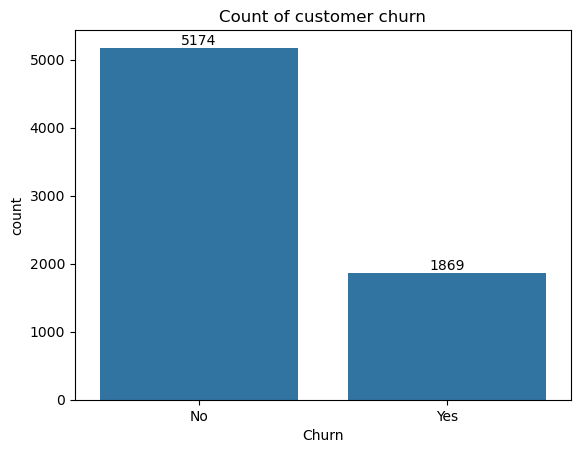

In [13]:
fig=sns.countplot(data_file,x='Churn')
fig.bar_label(fig.containers[0])
plt.title("Count of customer churn")
plt.show()

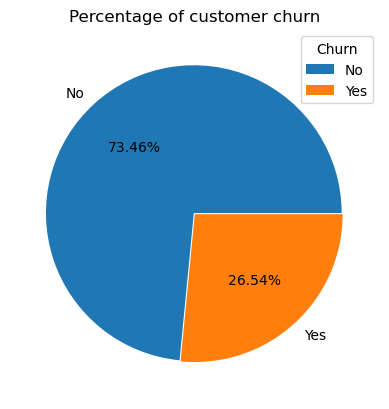

In [14]:
churns=data_file['Churn'].value_counts()
churns
myexplode=[0.01,0]
plt.pie(churns,labels=churns.index,autopct='%1.2f%%',explode=myexplode)
plt.title("Percentage of customer churn")
plt.legend(title='Churn')
plt.show()

## Conclusion: From the above graphs we conclude that 26.54%(count=1869 out of 7043) customers have churned out.

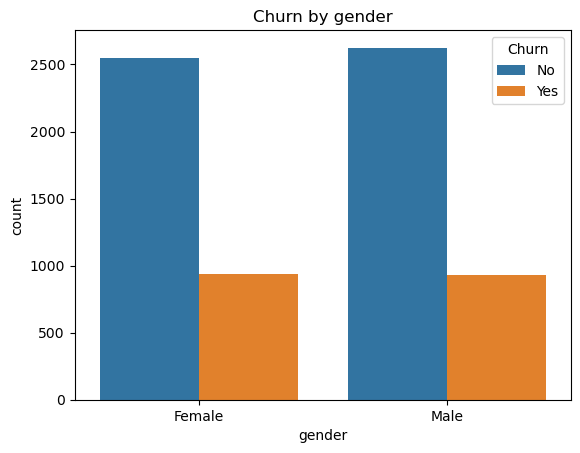

In [15]:
sns.countplot(data_file,x='gender',hue='Churn')
plt.title("Churn by gender")
plt.show()

## Conclusion: Churning out don't directly affected by the gender.

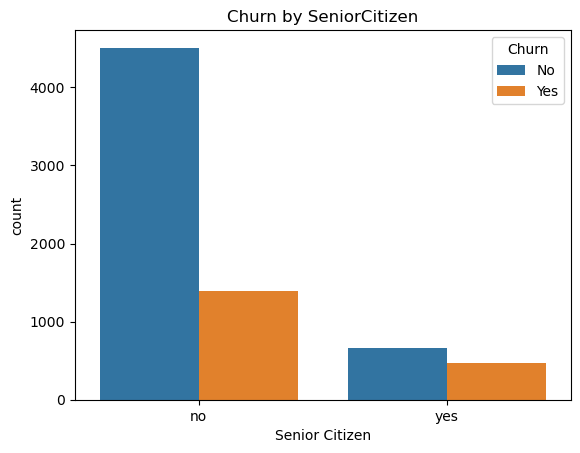

In [43]:
sns.countplot(data_file,x='SeniorCitizen',hue='Churn')
plt.title("Churn by SeniorCitizen")
plt.xlabel("Senior Citizen")
plt.show()

## Conclusion: Senior citizens are more likely to churn out.

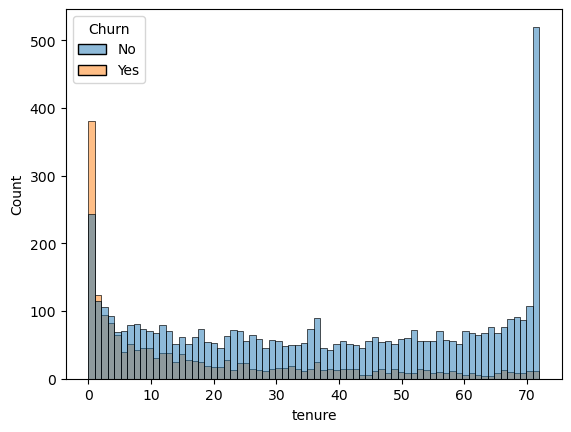

In [26]:
sns.histplot(data_file,x='tenure',bins=70,hue='Churn')
plt.show()

## Conclusion: People who have used services for a long time have stayed longer.

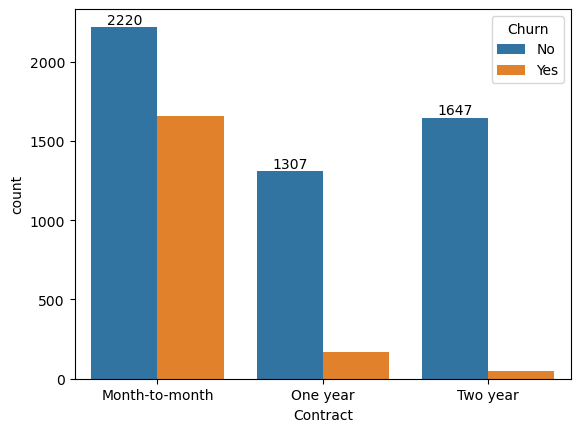

In [33]:
fig=sns.countplot(data_file,x='Contract',hue='Churn')
fig.bar_label(fig.containers[0])
plt.show()

## Conclusion: People with the contract of month to month are most likely to churn out than yearly based contract.

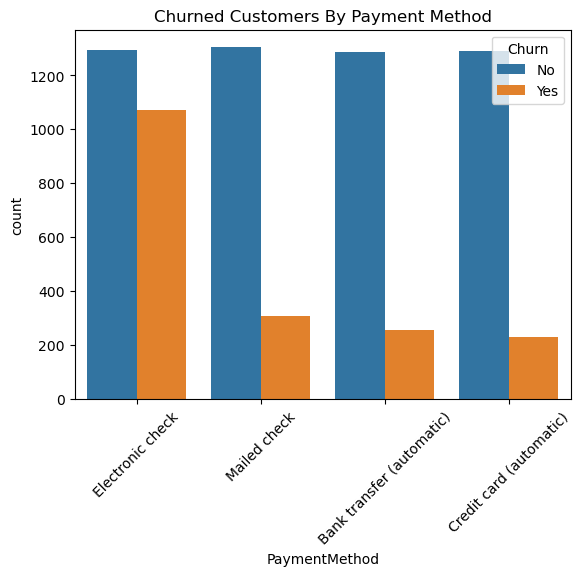

In [37]:
sns.countplot(data_file,x='PaymentMethod',hue='Churn')
plt.title("Churned Customers By Payment Method")
plt.xticks(rotation=45)
plt.show()

## Conclusion: People who do the payment by enectronic check are more likely to churn out then others payment Method.

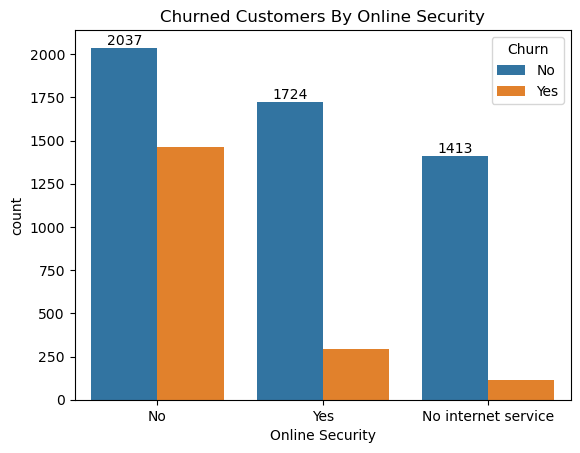

In [42]:
fig=sns.countplot(data_file,x='OnlineSecurity',hue='Churn')
fig.bar_label(fig.containers[0])
plt.title("Churned Customers By Online Security")
plt.xlabel("Online Security")
plt.show()

## Conclusion: People who dodn't take online security are more likely to churn out.